# in cites as compared to years since publication 

In [1]:
import sqlite3
import datetime
conng = sqlite3.connect('pmcv1-graph.db')  # CHANGE TO v2 and rerun!
cg = conng.cursor()
connf = sqlite3.connect('pmcv2-full.db') 
cf = connf.cursor()

In [2]:
cf.execute('''SELECT DISTINCT pmid FROM meta''')
pmids = cf.fetchall()
for i in range(len(pmids)): pmids[i] = pmids[i][0]
daysoutl = []
numincitesl = []
for pmid in pmids: #pmid = 24113773
    cf.execute('''SELECT pubdate FROM meta WHERE pmid = ? ''', [pmid])
    date = cf.fetchone()[0]
    date = datetime.date(int(date[0:4]), int(date[5:7]), int(date[8:10]))
    daysout = abs((date - datetime.date(2016,6,1)).days) # days between pub and data being fetched
    if daysout > 0:
        daysoutl.append(daysout)
        cg.execute('''SELECT incites FROM cites WHERE pmid = ? ''', [pmid])
        incites = len(cg.fetchone()[0].split(','))
        numincitesl.append(incites)

In [3]:
#plots
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
citedaysratio = pd.DataFrame(np.array(map(float,numincitesl)) / np.array(daysoutl))

In [5]:
citedaysratio.describe()

,0
count,347948.000000
mean,0.005236
std,0.013767
min,0.000194
25%,0.001587
50%,0.002841
75%,0.005291
max,2.675676


(array([  3.30488000e+05,   1.16440000e+04,   3.48900000e+03,
          1.07900000e+03,   4.91000000e+02,   2.97000000e+02,
          1.90000000e+02,   7.90000000e+01,   6.60000000e+01,
          1.10000000e+01,   2.00000000e+01,   1.20000000e+01,
          8.00000000e+00,   8.00000000e+00,   1.00000000e+01,
          4.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          4.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

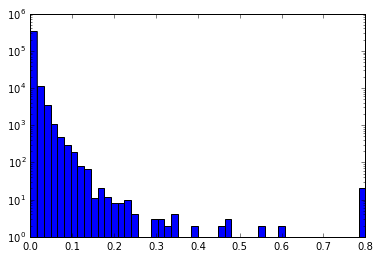

In [6]:
plt.hist(citedaysratio.clip_upper(.8), log = True, bins = 50)

In [7]:
counts, div = np.histogram(citedaysratio, bins = 200, range = (0,0.1))

In [8]:
totcounts = counts.sum()

## compute "citation quality" as citations / day given a PMID

reset kernel before beginning so code can easily be reused

In [28]:
import numpy as np
counts = [13027, 34108, 33621, 34843, 37047, 30559, 22854, 18040, 16354, 13309, 11530, 8719, 6640, 5484, 5449, 4666, 5021, 3330, 3152, 2689, 3257, 2887, 1743, 1852, 1591, 1778, 1336, 773, 1851, 491, 396, 1063, 1589, 338, 407, 922, 623, 406, 128, 457, 999, 677, 410, 190, 73, 492, 535, 423, 601, 47, 449, 175, 53, 43, 363, 572, 38, 497, 507, 39, 406, 27, 150, 22, 139, 30, 182, 24, 410, 24, 22, 553, 19, 18, 499, 12, 397, 20, 14, 19, 25, 15, 19, 18, 9, 14, 250, 9, 7, 10, 381, 9, 10, 7, 5, 327, 13, 7, 9, 7, 389, 9, 7, 6, 12, 277, 8, 6, 4, 6, 7, 72, 1, 5, 6, 5, 5, 38, 5, 4, 4, 6, 7, 5, 1, 144, 4, 6, 0, 6, 1, 4, 1, 179, 3, 3, 7, 1, 2, 2, 2, 1, 135, 1, 4, 4, 3, 2, 5, 5, 1, 5, 1, 101, 4, 3, 2, 2, 0, 1, 3, 3, 2, 3, 4, 1, 133, 3, 1, 3, 0, 0, 2, 2, 3, 3, 2, 1, 3, 3, 3, 99, 3, 1, 2, 1, 2, 5, 1, 0, 2, 3, 2, 0, 2, 1, 3, 2, 0, 1]
sumcounts = 347499.
div = [ 0. , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035, 0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075, 0.008 , 0.0085, 0.009 , 0.0095, 0.01 , 0.0105, 0.011 , 0.0115, 0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155, 0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195, 0.02 , 0.0205, 0.021 , 0.0215, 0.022 , 0.0225, 0.023 , 0.0235, 0.024 , 0.0245, 0.025 , 0.0255, 0.026 , 0.0265, 0.027 , 0.0275, 0.028 , 0.0285, 0.029 , 0.0295, 0.03 , 0.0305, 0.031 , 0.0315, 0.032 , 0.0325, 0.033 , 0.0335, 0.034 , 0.0345, 0.035 , 0.0355, 0.036 , 0.0365, 0.037 , 0.0375, 0.038 , 0.0385, 0.039 , 0.0395, 0.04 , 0.0405, 0.041 , 0.0415, 0.042 , 0.0425, 0.043 , 0.0435, 0.044 , 0.0445, 0.045 , 0.0455, 0.046 , 0.0465, 0.047 , 0.0475, 0.048 , 0.0485, 0.049 , 0.0495, 0.05 , 0.0505, 0.051 , 0.0515, 0.052 , 0.0525, 0.053 , 0.0535, 0.054 , 0.0545, 0.055 , 0.0555, 0.056 , 0.0565, 0.057 , 0.0575, 0.058 , 0.0585, 0.059 , 0.0595, 0.06 , 0.0605, 0.061 , 0.0615, 0.062 , 0.0625, 0.063 , 0.0635, 0.064 , 0.0645, 0.065 , 0.0655, 0.066 , 0.0665, 0.067 , 0.0675, 0.068 , 0.0685, 0.069 , 0.0695, 0.07 , 0.0705, 0.071 , 0.0715, 0.072 , 0.0725, 0.073 , 0.0735, 0.074 , 0.0745, 0.075 , 0.0755, 0.076 , 0.0765, 0.077 , 0.0775, 0.078 , 0.0785, 0.079 , 0.0795, 0.08 , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835, 0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875, 0.088 , 0.0885, 0.089 , 0.0895, 0.09 , 0.0905, 0.091 , 0.0915, 0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955, 0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995, 0.1 ]

In [31]:
import sqlite3
import datetime
conng = sqlite3.connect('pmcv1-graph.db')  # CHANGE TO v2 and rerun!
cg = conng.cursor()
connf = sqlite3.connect('pmcv2-full.db') 
cf = connf.cursor()

In [61]:
cf.execute('SELECT pmid FROM meta ORDER BY RANDOM() LIMIT 1')
pmid = cf.fetchone()[0]
print pmid
#pmid = 26938165
cf.execute('''SELECT pubdate FROM meta WHERE pmid = ? ''', [pmid])
date = cf.fetchone()[0]
date = datetime.date(int(date[0:4]), int(date[5:7]), int(date[8:10]))
daysout = abs((date - datetime.date(2016,6,1)).days) # days between pub and data being fetched
if daysout <= 0:
    pass #return median value?
else:
    cg.execute('''SELECT incites FROM cites WHERE pmid = ? ''', [pmid])
    incites = len(cg.fetchone()[0].split(','))
    citeratio = incites / float(daysout)
# lookup in histogram
for i, division in enumerate(div):
    if citeratio < division:
        print "percentile: {}".format(np.array(counts[0:i+1]).sum() / sumcounts * 100)
        break

20191640
percentile: 13.5640678103


In [63]:
# as function
import numpy as np
import datetime

def incitepercentile(pmid, fullcursor, graphcursor): 
    counts = [13027, 34108, 33621, 34843, 37047, 30559, 22854, 18040, 16354, 13309, 11530, 8719, 6640, 5484, 5449, 4666, 5021, 3330, 3152, 2689, 3257, 2887, 1743, 1852, 1591, 1778, 1336, 773, 1851, 491, 396, 1063, 1589, 338, 407, 922, 623, 406, 128, 457, 999, 677, 410, 190, 73, 492, 535, 423, 601, 47, 449, 175, 53, 43, 363, 572, 38, 497, 507, 39, 406, 27, 150, 22, 139, 30, 182, 24, 410, 24, 22, 553, 19, 18, 499, 12, 397, 20, 14, 19, 25, 15, 19, 18, 9, 14, 250, 9, 7, 10, 381, 9, 10, 7, 5, 327, 13, 7, 9, 7, 389, 9, 7, 6, 12, 277, 8, 6, 4, 6, 7, 72, 1, 5, 6, 5, 5, 38, 5, 4, 4, 6, 7, 5, 1, 144, 4, 6, 0, 6, 1, 4, 1, 179, 3, 3, 7, 1, 2, 2, 2, 1, 135, 1, 4, 4, 3, 2, 5, 5, 1, 5, 1, 101, 4, 3, 2, 2, 0, 1, 3, 3, 2, 3, 4, 1, 133, 3, 1, 3, 0, 0, 2, 2, 3, 3, 2, 1, 3, 3, 3, 99, 3, 1, 2, 1, 2, 5, 1, 0, 2, 3, 2, 0, 2, 1, 3, 2, 0, 1]
    sumcounts = 347499.
    div = [ 0. , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035, 0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075, 0.008 , 0.0085, 0.009 , 0.0095, 0.01 , 0.0105, 0.011 , 0.0115, 0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155, 0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195, 0.02 , 0.0205, 0.021 , 0.0215, 0.022 , 0.0225, 0.023 , 0.0235, 0.024 , 0.0245, 0.025 , 0.0255, 0.026 , 0.0265, 0.027 , 0.0275, 0.028 , 0.0285, 0.029 , 0.0295, 0.03 , 0.0305, 0.031 , 0.0315, 0.032 , 0.0325, 0.033 , 0.0335, 0.034 , 0.0345, 0.035 , 0.0355, 0.036 , 0.0365, 0.037 , 0.0375, 0.038 , 0.0385, 0.039 , 0.0395, 0.04 , 0.0405, 0.041 , 0.0415, 0.042 , 0.0425, 0.043 , 0.0435, 0.044 , 0.0445, 0.045 , 0.0455, 0.046 , 0.0465, 0.047 , 0.0475, 0.048 , 0.0485, 0.049 , 0.0495, 0.05 , 0.0505, 0.051 , 0.0515, 0.052 , 0.0525, 0.053 , 0.0535, 0.054 , 0.0545, 0.055 , 0.0555, 0.056 , 0.0565, 0.057 , 0.0575, 0.058 , 0.0585, 0.059 , 0.0595, 0.06 , 0.0605, 0.061 , 0.0615, 0.062 , 0.0625, 0.063 , 0.0635, 0.064 , 0.0645, 0.065 , 0.0655, 0.066 , 0.0665, 0.067 , 0.0675, 0.068 , 0.0685, 0.069 , 0.0695, 0.07 , 0.0705, 0.071 , 0.0715, 0.072 , 0.0725, 0.073 , 0.0735, 0.074 , 0.0745, 0.075 , 0.0755, 0.076 , 0.0765, 0.077 , 0.0775, 0.078 , 0.0785, 0.079 , 0.0795, 0.08 , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835, 0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875, 0.088 , 0.0885, 0.089 , 0.0895, 0.09 , 0.0905, 0.091 , 0.0915, 0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955, 0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995, 0.1 ]
    fullcursor.execute('''SELECT pubdate FROM meta WHERE pmid = ? ''', [pmid])
    date = fullcursor.fetchone()[0]
    date = datetime.date(int(date[0:4]), int(date[5:7]), int(date[8:10]))
    daysout = abs((date - datetime.date(2016,6,1)).days) # days between pub and data being fetched
    if daysout <= 0:
        return 0
    else:
        graphcursor.execute('''SELECT incites FROM cites WHERE pmid = ? ''', [pmid])
        incites = len(cg.fetchone()[0].split(','))
        citeratio = incites / float(daysout)
    # lookup in histogram
    for i, division in enumerate(div):
        if citeratio < division:
            return np.array(counts[0:i+1]).sum() / sumcounts * 100

In [64]:
incitepercentile(20191640, cf, cg)

13.56406781026708

# "quality" of in-cites. how highly cited are the in cites? 

could also examine this in terms of how highly cited the in-citer's authors are, but will leave this as future work

To consider: how to address that very highly cited in-cites should count for a lot? 3 20%tile incites for one paper shouldn't look as good as 1 60%tile incite for another paper. Need to weight highly cited papers more

For now, will simply return mean quality

In [ ]:
# go through each in cite - how high quality are the incites
# use baysian smoothing to address papers with low citation counts
# -> add 5 average quality cites to every cite before computing metric

In [1]:
import sqlite3
conng = sqlite3.connect('pmcv1-graph.db')  # CHANGE TO v2 and rerun!
cg = conng.cursor()
connf = sqlite3.connect('pmcv2-full.db') 
cf = connf.cursor()

In [29]:
import numpy as np
import datetime

def incitepercentile(pmid, fullcursor, graphcursor): 
    counts = [13027, 34108, 33621, 34843, 37047, 30559, 22854, 18040, 16354, 13309, 11530, 8719, 6640, 5484, 5449, 4666, 5021, 3330, 3152, 2689, 3257, 2887, 1743, 1852, 1591, 1778, 1336, 773, 1851, 491, 396, 1063, 1589, 338, 407, 922, 623, 406, 128, 457, 999, 677, 410, 190, 73, 492, 535, 423, 601, 47, 449, 175, 53, 43, 363, 572, 38, 497, 507, 39, 406, 27, 150, 22, 139, 30, 182, 24, 410, 24, 22, 553, 19, 18, 499, 12, 397, 20, 14, 19, 25, 15, 19, 18, 9, 14, 250, 9, 7, 10, 381, 9, 10, 7, 5, 327, 13, 7, 9, 7, 389, 9, 7, 6, 12, 277, 8, 6, 4, 6, 7, 72, 1, 5, 6, 5, 5, 38, 5, 4, 4, 6, 7, 5, 1, 144, 4, 6, 0, 6, 1, 4, 1, 179, 3, 3, 7, 1, 2, 2, 2, 1, 135, 1, 4, 4, 3, 2, 5, 5, 1, 5, 1, 101, 4, 3, 2, 2, 0, 1, 3, 3, 2, 3, 4, 1, 133, 3, 1, 3, 0, 0, 2, 2, 3, 3, 2, 1, 3, 3, 3, 99, 3, 1, 2, 1, 2, 5, 1, 0, 2, 3, 2, 0, 2, 1, 3, 2, 0, 1]
    sumcounts = 347499.
    div = [ 0. , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035, 0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075, 0.008 , 0.0085, 0.009 , 0.0095, 0.01 , 0.0105, 0.011 , 0.0115, 0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155, 0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195, 0.02 , 0.0205, 0.021 , 0.0215, 0.022 , 0.0225, 0.023 , 0.0235, 0.024 , 0.0245, 0.025 , 0.0255, 0.026 , 0.0265, 0.027 , 0.0275, 0.028 , 0.0285, 0.029 , 0.0295, 0.03 , 0.0305, 0.031 , 0.0315, 0.032 , 0.0325, 0.033 , 0.0335, 0.034 , 0.0345, 0.035 , 0.0355, 0.036 , 0.0365, 0.037 , 0.0375, 0.038 , 0.0385, 0.039 , 0.0395, 0.04 , 0.0405, 0.041 , 0.0415, 0.042 , 0.0425, 0.043 , 0.0435, 0.044 , 0.0445, 0.045 , 0.0455, 0.046 , 0.0465, 0.047 , 0.0475, 0.048 , 0.0485, 0.049 , 0.0495, 0.05 , 0.0505, 0.051 , 0.0515, 0.052 , 0.0525, 0.053 , 0.0535, 0.054 , 0.0545, 0.055 , 0.0555, 0.056 , 0.0565, 0.057 , 0.0575, 0.058 , 0.0585, 0.059 , 0.0595, 0.06 , 0.0605, 0.061 , 0.0615, 0.062 , 0.0625, 0.063 , 0.0635, 0.064 , 0.0645, 0.065 , 0.0655, 0.066 , 0.0665, 0.067 , 0.0675, 0.068 , 0.0685, 0.069 , 0.0695, 0.07 , 0.0705, 0.071 , 0.0715, 0.072 , 0.0725, 0.073 , 0.0735, 0.074 , 0.0745, 0.075 , 0.0755, 0.076 , 0.0765, 0.077 , 0.0775, 0.078 , 0.0785, 0.079 , 0.0795, 0.08 , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835, 0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875, 0.088 , 0.0885, 0.089 , 0.0895, 0.09 , 0.0905, 0.091 , 0.0915, 0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955, 0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995, 0.1 ]
    fullcursor.execute('''SELECT pubdate FROM meta WHERE pmid = ? ''', [pmid])
    date = fullcursor.fetchone()[0]
    date = datetime.date(int(date[0:4]), int(date[5:7]), int(date[8:10]))
    daysout = abs((date - datetime.date(2016,6,1)).days) # days between pub and data being fetched
    if daysout <= 0:
        return 0
    else:
        graphcursor.execute('''SELECT incites FROM cites WHERE pmid = ? ''', [pmid])
        incites = len(cg.fetchone()[0].split(','))
        citeratio = incites / float(daysout)
    # lookup in histogram
    for i, division in enumerate(div):
        if citeratio < division:
            return np.array(counts[0:i+1]).sum() / sumcounts * 100

def incitequalityindex(pmid, fullcursor, graphcursor):
    graphcursor.execute('''SELECT incites FROM cites WHERE pmid = ?''', [pmid])
    try:
        incites = map(int, graphcursor.fetchall()[0][0].split(","))
    except ValueError: # no incites in db for this pub
        return 69.5
    results = []
    for cite in incites:
        try:
            result = incitepercentile(cite, fullcursor, graphcursor)
        except TypeError: # issue with date
            result = None
        if result != None:
            results.append(result)
    if np.isnan(np.array(results).mean()):
        return 69.5
    return np.array(results).mean()

In [5]:
incitequalityindex(25901944, cf, cg)

75.78813176440795

In [31]:
# find mean incitequalityindex
cf.execute('''SELECT DISTINCT pmid FROM meta''')
pmids = map(lambda x: x[0], cf.fetchall())
globalincitequality = []
for pmid in pmids:
    result = incitequalityindex(pmid, cf, cg)
    if result != 69.5:
        globalincitequality.append(result)

In [34]:
import pandas as pd
pd.DataFrame(globalincitequality).describe()

,0
count,123965.000000
mean,69.548052
std,18.229639
min,0.000000
25%,59.297725
50%,71.473388
75%,83.103453
max,99.991942


In [ ]:
# so center value should be 69.5

# author self-citation index

unclear what the source of error is here, return to this later

In [1]:
import sqlite3
conng = sqlite3.connect('pmcv1-graph.db')  # CHANGE TO v2 and rerun!
cg = conng.cursor()
connf = sqlite3.connect('pmcv2-full.db') 
cf = connf.cursor()

In [40]:
def selfcitesperpub(author, fullcursor, graphcursor):
    fullcursor.execute('''SELECT DISTINCT pmid FROM authors WHERE abbr = ?''', [author])
    authorspapers = set(map(lambda x: x[0], fullcursor.fetchall()))
    selfcites = 0.
    pubs = len(authorspapers)
    for pmid in authorspapers:
        graphcursor.execute('''SELECT outcites FROM cites WHERE pmid = ?''', [pmid])
        outcites = set(map(lambda x: x[0], graphcursor.fetchall()))
        selfcites += len(authorspapers.intersection(outcites))
    return selfcites / float(pubs)

In [31]:
selfcitesperpub(u'kosukeyoshihara', cf, cg)

0.0

In [35]:
cf.execute('''SELECT DISTINCT abbr FROM authors''')
allauthors = map(lambda x: x[0], cf.fetchall())

In [37]:
selfcitesglobal = []
%time for author in allauthors: selfcitesglobal.append(selfcitesperpub(author, cf, cg))

CPU times: user 37 s, sys: 25.7 s, total: 1min 2s
Wall time: 1min 2s


In [38]:
#plots
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [39]:
pd.DataFrame(selfcitesglobal).describe()

,0
count,1236363.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0
